In [1]:
import pandas as pd
import numpy as np

import scipy.stats as ss
import scipy.special as sc
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
photos = pd.read_csv('5_task_1.csv')

In [3]:
photos.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [4]:
photos.shape

(30000, 3)

In [5]:
photos.group.value_counts()

C    10000
B    10000
A    10000
Name: group, dtype: int64

In [11]:
photos_a = photos.query('group == "A"').events
photos_b = photos.query('group == "B"').events
photos_c = photos.query('group == "C"').events

In [12]:
pg.homoscedasticity(data=photos, dv='events', group='group')

,W,pval,equal_var
levene,2.26226,0.104133,True


In [13]:
ss.levene(photos_a, photos_b, photos_c)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [14]:
print(ss.normaltest(photos_a))
print(ss.normaltest(photos_b))
print(ss.normaltest(photos_c))

NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)
NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)
NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)


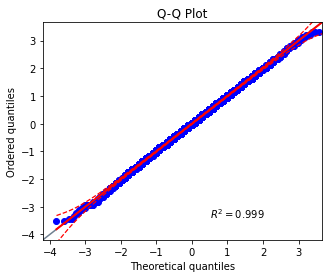

In [22]:
pg.qqplot(photos_a);

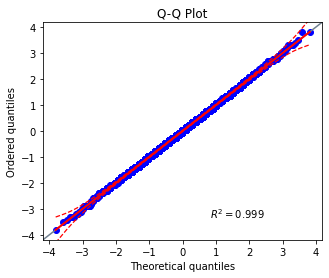

In [17]:
pg.qqplot(photos_b);

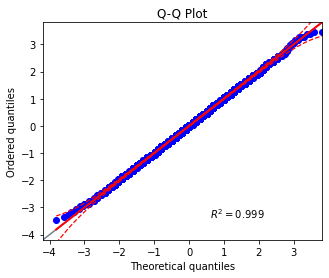

In [18]:
pg.qqplot(photos_c);

In [24]:
pg.welch_anova(data=photos, dv='events', between='group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,19996.209267,2924.792424,0.0,0.161377


In [26]:
model = smf.ols(formula='events ~ C(group)', data=photos).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(group),2.0,5.729361e+05,286468.062300,2886.166657,0.0
Residual,29997.0,2.977369e+06,99.255551,NaN,NaN


In [27]:
pg.pairwise_tukey(data=photos, dv='events', between='group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.001,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.001,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.001,1.018089


In [29]:
pg.pairwise_tukey(data=photos, dv='events', between='group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.001,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.001,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.001,1.018089


In [30]:
pairwise_tukeyhsd(photos.events, photos.group).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.001,7.7038,8.3642,True
A,C,-2.1093,0.001,-2.4395,-1.7791,True
B,C,-10.1433,0.001,-10.4735,-9.8131,True


In [31]:
app = pd.read_csv('5_task_2.csv')

In [32]:
app.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [42]:
app_test = app.query('group == "test"')
app_control = app.query('group == "control"')

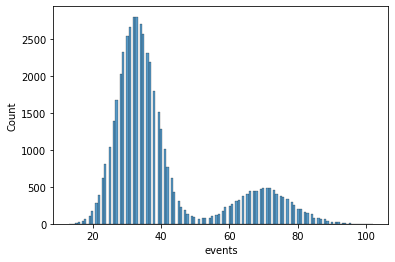

In [43]:
sns.histplot(app_test.events);

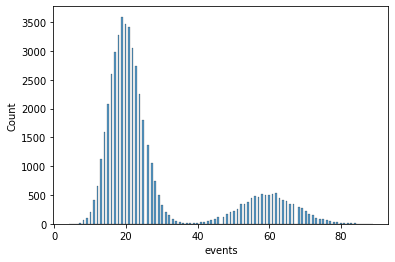

In [44]:
sns.histplot(app_control.events);

In [47]:
app_control.query('segment == "high"').events.std()

7.805346866345555

In [49]:
model_main = smf.ols('events ~ segment*group', data=app).fit()
anova_lm(model_main)

,df,sum_sq,mean_sq,F,PR(>F)
segment,1.0,2.362480e+07,2.362480e+07,689756.377484,0.000000e+00
group,1.0,3.837195e+06,3.837195e+06,112031.864119,0.000000e+00
segment:group,1.0,3.664244e+04,3.664244e+04,1069.823273,2.060261e-233
Residual,99996.0,3.424956e+06,3.425093e+01,NaN,NaN


In [50]:
pg.anova(data=app, dv='events', between=['segment', 'group'])

,Source,SS,DF,MS,F,p-unc,np2
0,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
1,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
2,segment * group,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


In [55]:
app['comb'] = app.group + '/' + app.segment

In [57]:
MultiComparison(app.events, app.comb).tukeyhsd().summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control/high,control/low,-39.9392,0.001,-40.1073,-39.7711,True
control/high,test/high,9.9677,0.001,9.7551,10.1803,True
control/high,test/low,-26.9449,0.001,-27.113,-26.7768,True
control/low,test/high,49.9069,0.001,49.7388,50.075,True
control/low,test/low,12.9944,0.001,12.888,13.1007,True
test/high,test/low,-36.9126,0.001,-37.0807,-36.7445,True


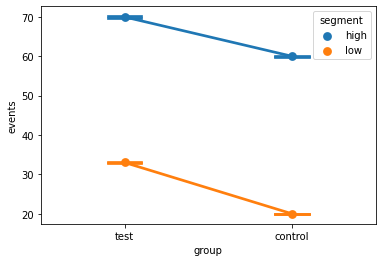

In [58]:
sns.pointplot(x='group', y='events', hue='segment', data=app, capsize=0.2);